# 
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
data=pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data1=pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
data3=data1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
data3[data3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
data4=data3.drop_duplicates()
data4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
data4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [11]:
data4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<Axes: >

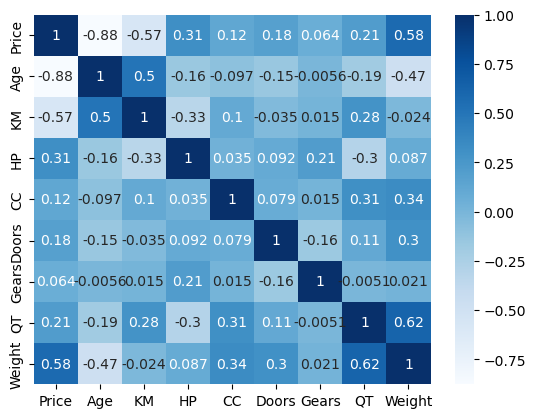

In [12]:
# Correlation Matrix

sns.heatmap(data4.corr(),annot=True,cmap=plt.cm.Blues)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


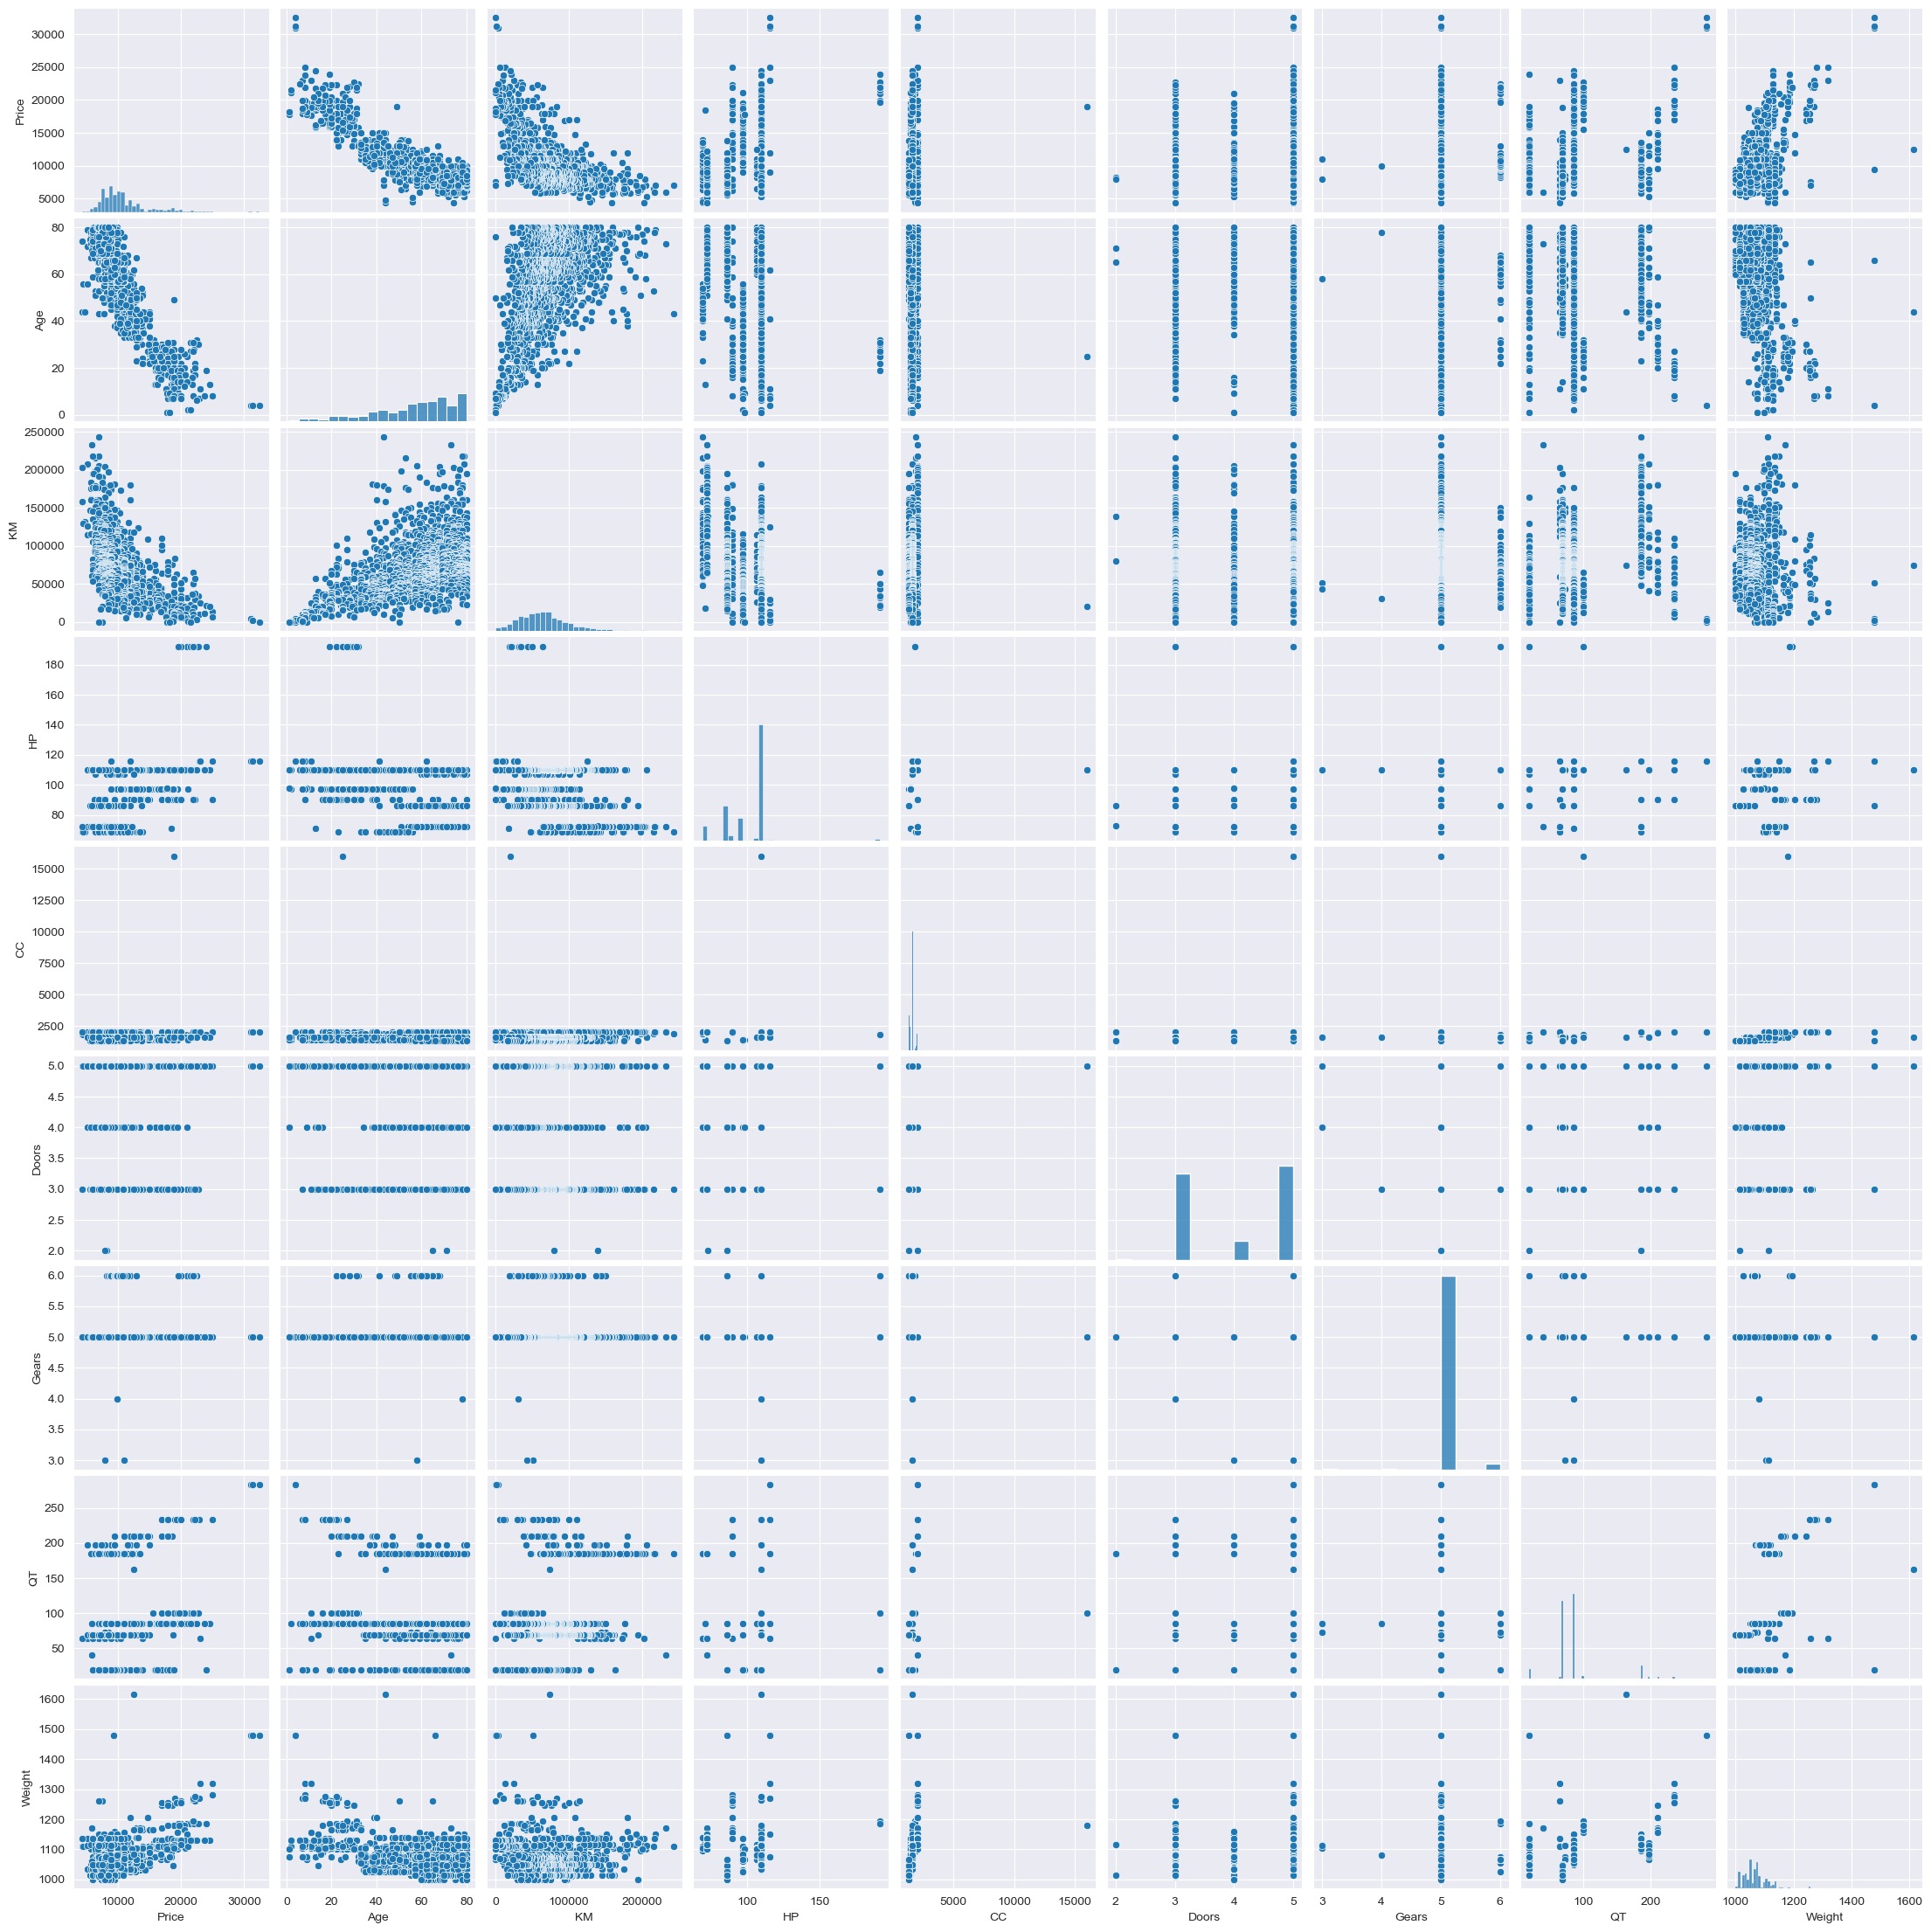

In [13]:
# Format the plot background and scatter plots for all the variables

sns.set_style(style='darkgrid')
sns.pairplot(data4)

# Preparing a model

In [15]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data4).fit()

In [16]:
model.rsquared

0.8625200256947

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:20:55   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF and Checking for Multicollinearity

In [22]:
rsq_Age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=data4).fit().rsquared
vif_Age= 1/(1-rsq_hp) 

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=data4).fit().rsquared
vif_KM = 1/(1-rsq_wt) 

rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=data4).fit().rsquared
vif_HP = 1/(1-rsq_vol) 

rsq_CC = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=data4).fit().rsquared
vif_CC = 1/(1-rsq_sp) 

rsq_Doors = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=data4).fit().rsquared
vif_Doors = 1/(1-rsq_sp)

rsq_Gears = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=data4).fit().rsquared
vif_Gears = 1/(1-rsq_sp)

rsq_QT = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=data4).fit().rsquared
vif_QT = 1/(1-rsq_sp)

rsq_Weight = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=data4).fit().rsquared
vif_Weight = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,2.487180
4,Doors,2.487180
5,Gears,2.487180
6,QT,2.487180
7,Weight,2.487180


# Treatment for Multicollinearity

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,
          1.,   2.,   0.,   2.,   7.,   8.,  28.,  46.,  64., 110., 142.,
        208., 171., 189., 138., 121.,  75.,  50.,  27.,  15.,  11.,   5.,
          2.,   1.,   4.,   0.,   0.,   1.,   2.]),
 array([-9303.07039107, -8909.3588523 , -8515.64731352, -8121.93577474,
        -7728.22423596, -7334.51269718, -6940.8011584 , -6547.08961963,
        -6153.37808085, -5759.66654207, -5365.95500329, -4972.24346451,
        -4578.53192574, -4184.82038696, -3791.10884818, -3397.3973094 ,
        -3003.68577062, -2609.97423184, -2216.26269307, -1822.55115429,
        -1428.83961551, -1035.12807673,  -641.41653795,  -247.70499917,
          146.0065396 ,   539.71807838,   933.42961716,  1327.14115594,
         1720.85269472,  2114.5642335 ,  2508.27577227,  2901.98731105,
         3295.69884983,  3689.41038861,  4083.12192739,  4476.83346617,
         4870.54500494,  5264.25654372,  5657.9680825 ,  6051.67962128,
      

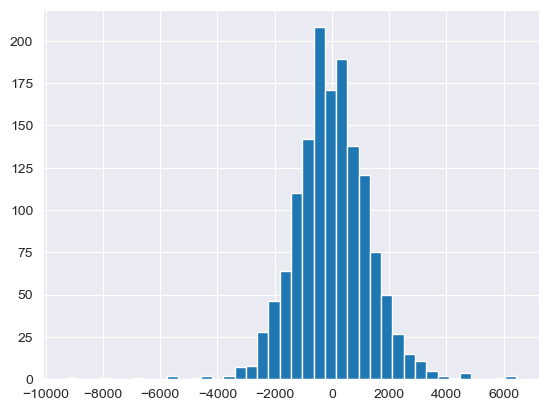

In [24]:
plt.hist(model.resid,bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f54a50efe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f54a50f520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f54a50ed40>],
 'medians': [<matplotlib.lines.Line2D at 0x1f54a50fa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f54a50fd00>],
 'means': []}

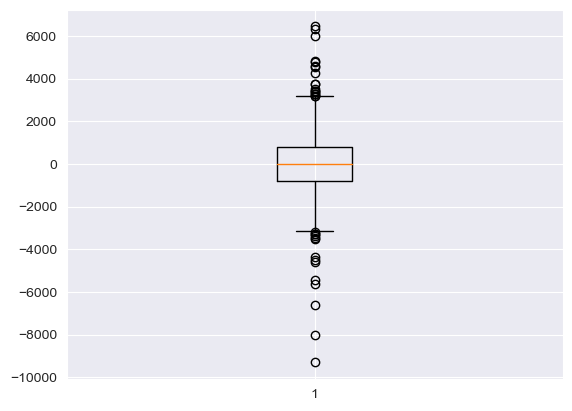

In [25]:
plt.boxplot(model.resid)

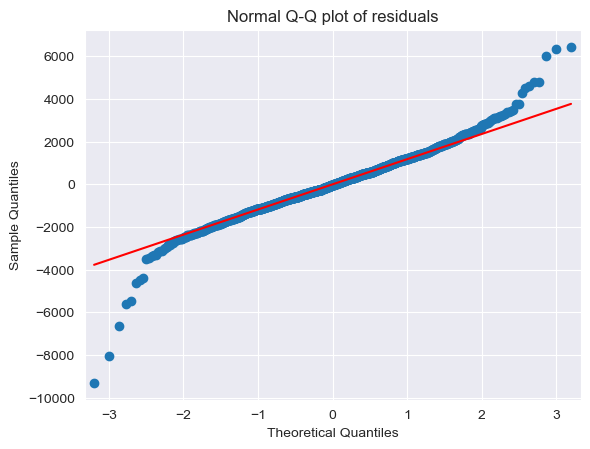

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

#minmax scaler
#robust scaler

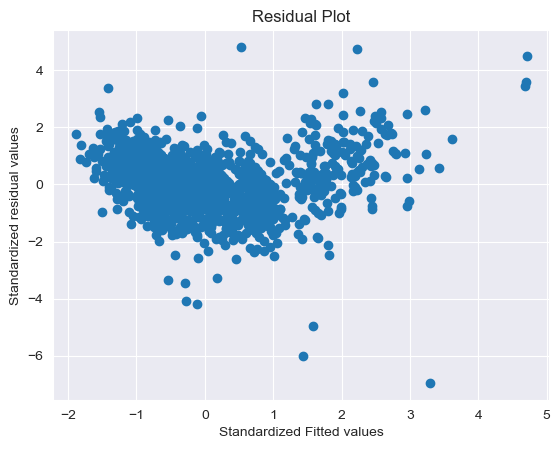

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Error vs Feature ( should be independent)

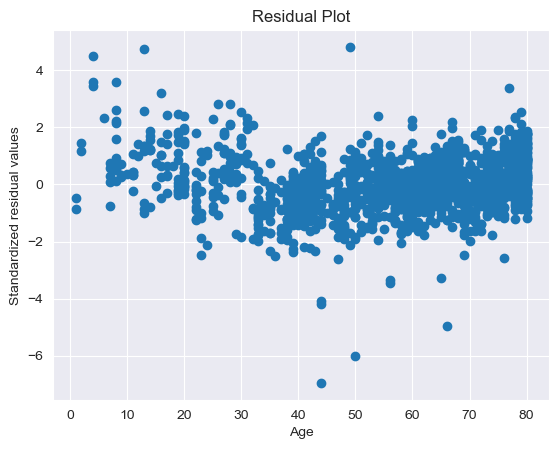

In [31]:
plt.scatter(data4["Age"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Age')
plt.ylabel('Standardized residual values')
plt.show()

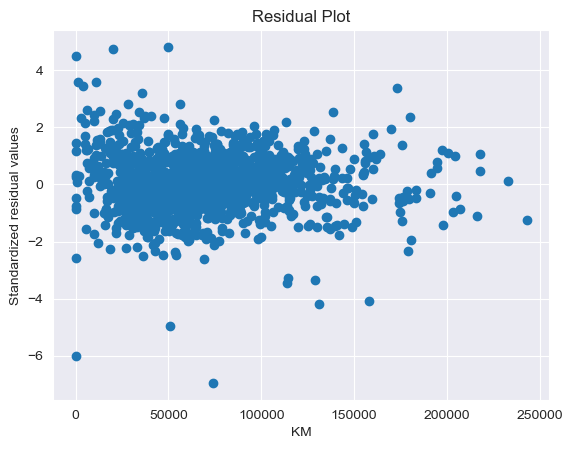

In [33]:
plt.scatter(data4["KM"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('KM')
plt.ylabel('Standardized residual values')
plt.show()

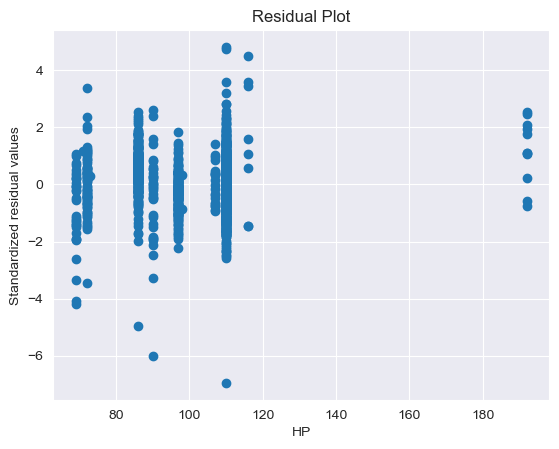

In [34]:
plt.scatter(data4["HP"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('HP')
plt.ylabel('Standardized residual values')
plt.show()

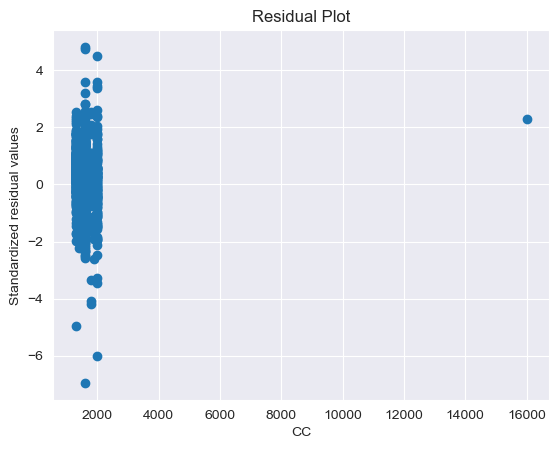

In [35]:
plt.scatter(data4["CC"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('CC')
plt.ylabel('Standardized residual values')
plt.show()

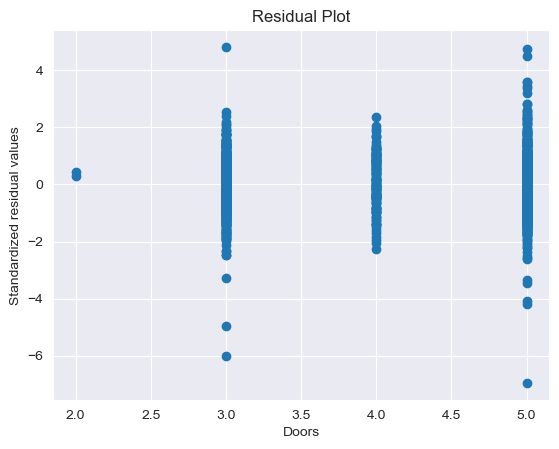

In [36]:
plt.scatter(data4["Doors"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Doors')
plt.ylabel('Standardized residual values')
plt.show()

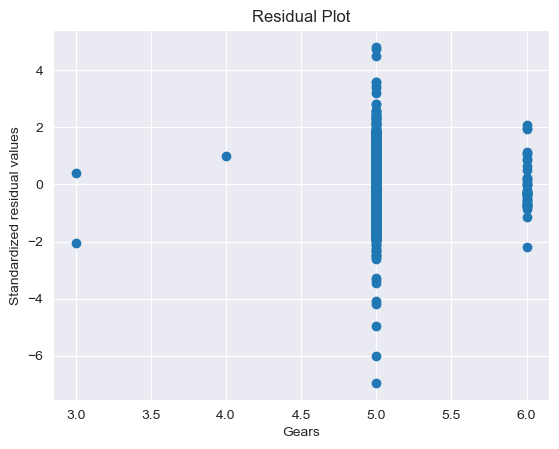

In [37]:
plt.scatter(data4["Gears"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Gears')
plt.ylabel('Standardized residual values')
plt.show()

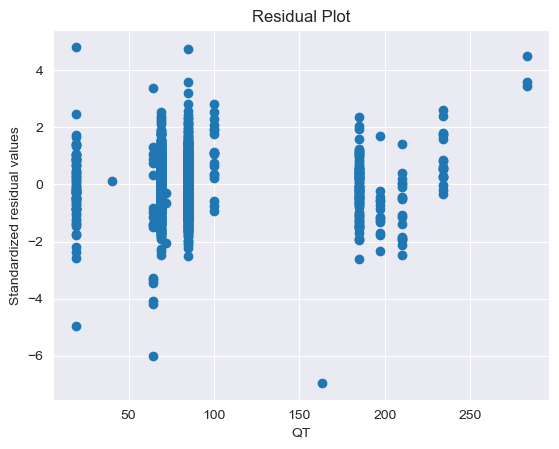

In [38]:
plt.scatter(data4["QT"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('QT')
plt.ylabel('Standardized residual values')
plt.show()

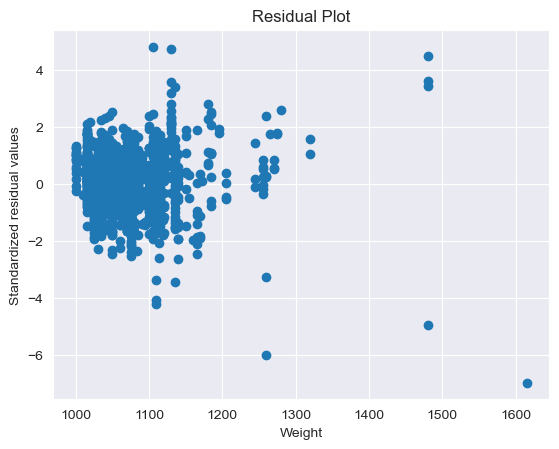

In [39]:
plt.scatter(data4["Weight"],
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Weight')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/Outliers

# Cook’s Distance

In [40]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [41]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

In [42]:
K=9
N=1435
(3*K)/N

0.018815331010452963

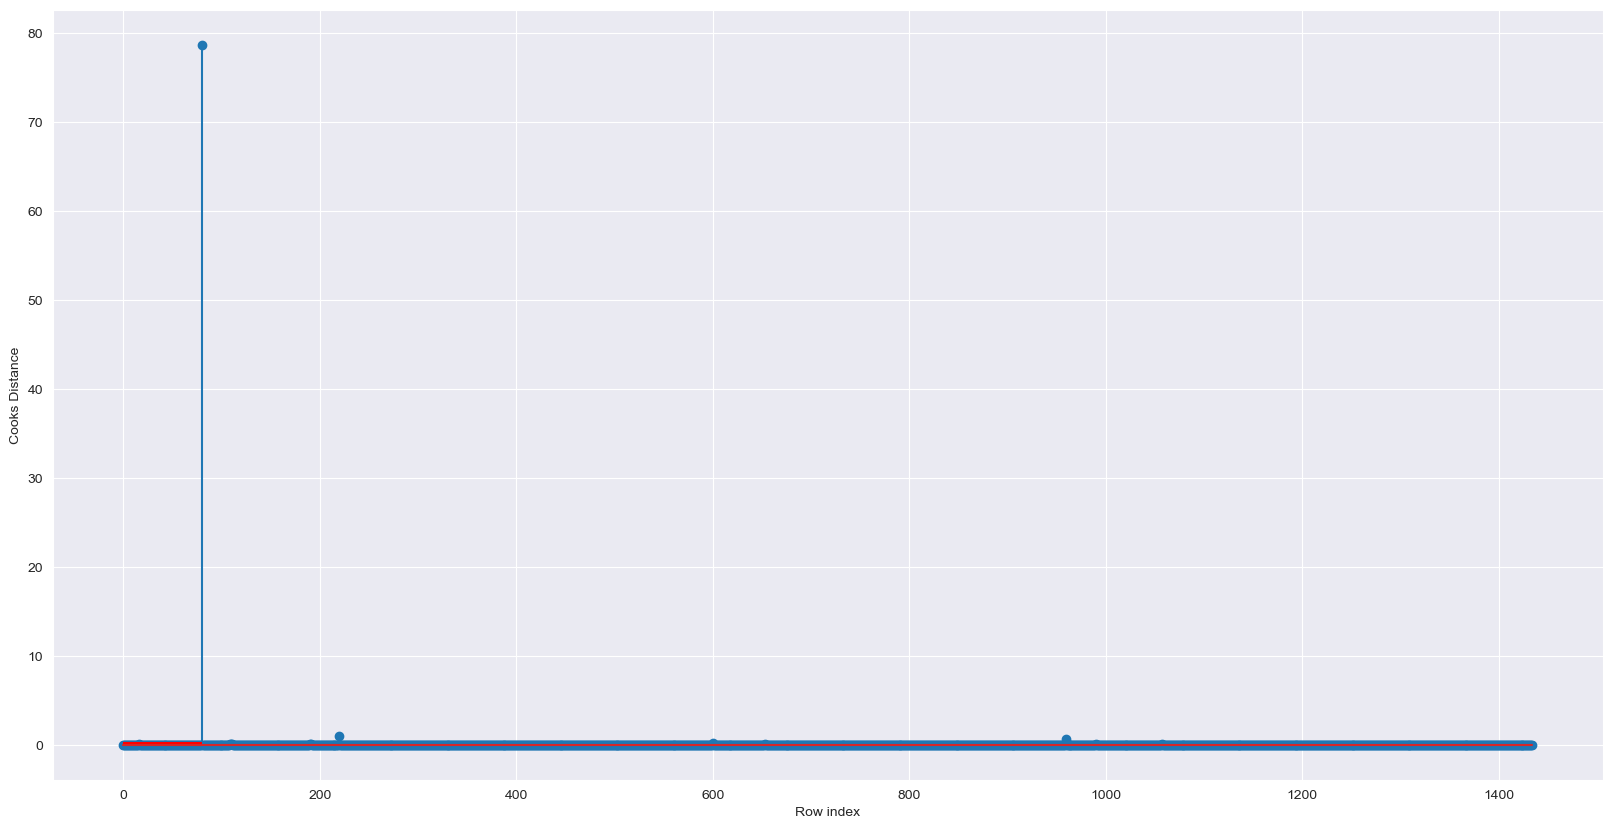

In [44]:
#Plot the influencers values using stem plot

fig = plt.figure(figsize=(20,10))
plt.stem(np.arange(len(data4)), np.round(c, 3))
plt.hlines(y=0.14814814814814814,xmin=0,xmax=80,color="red")
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

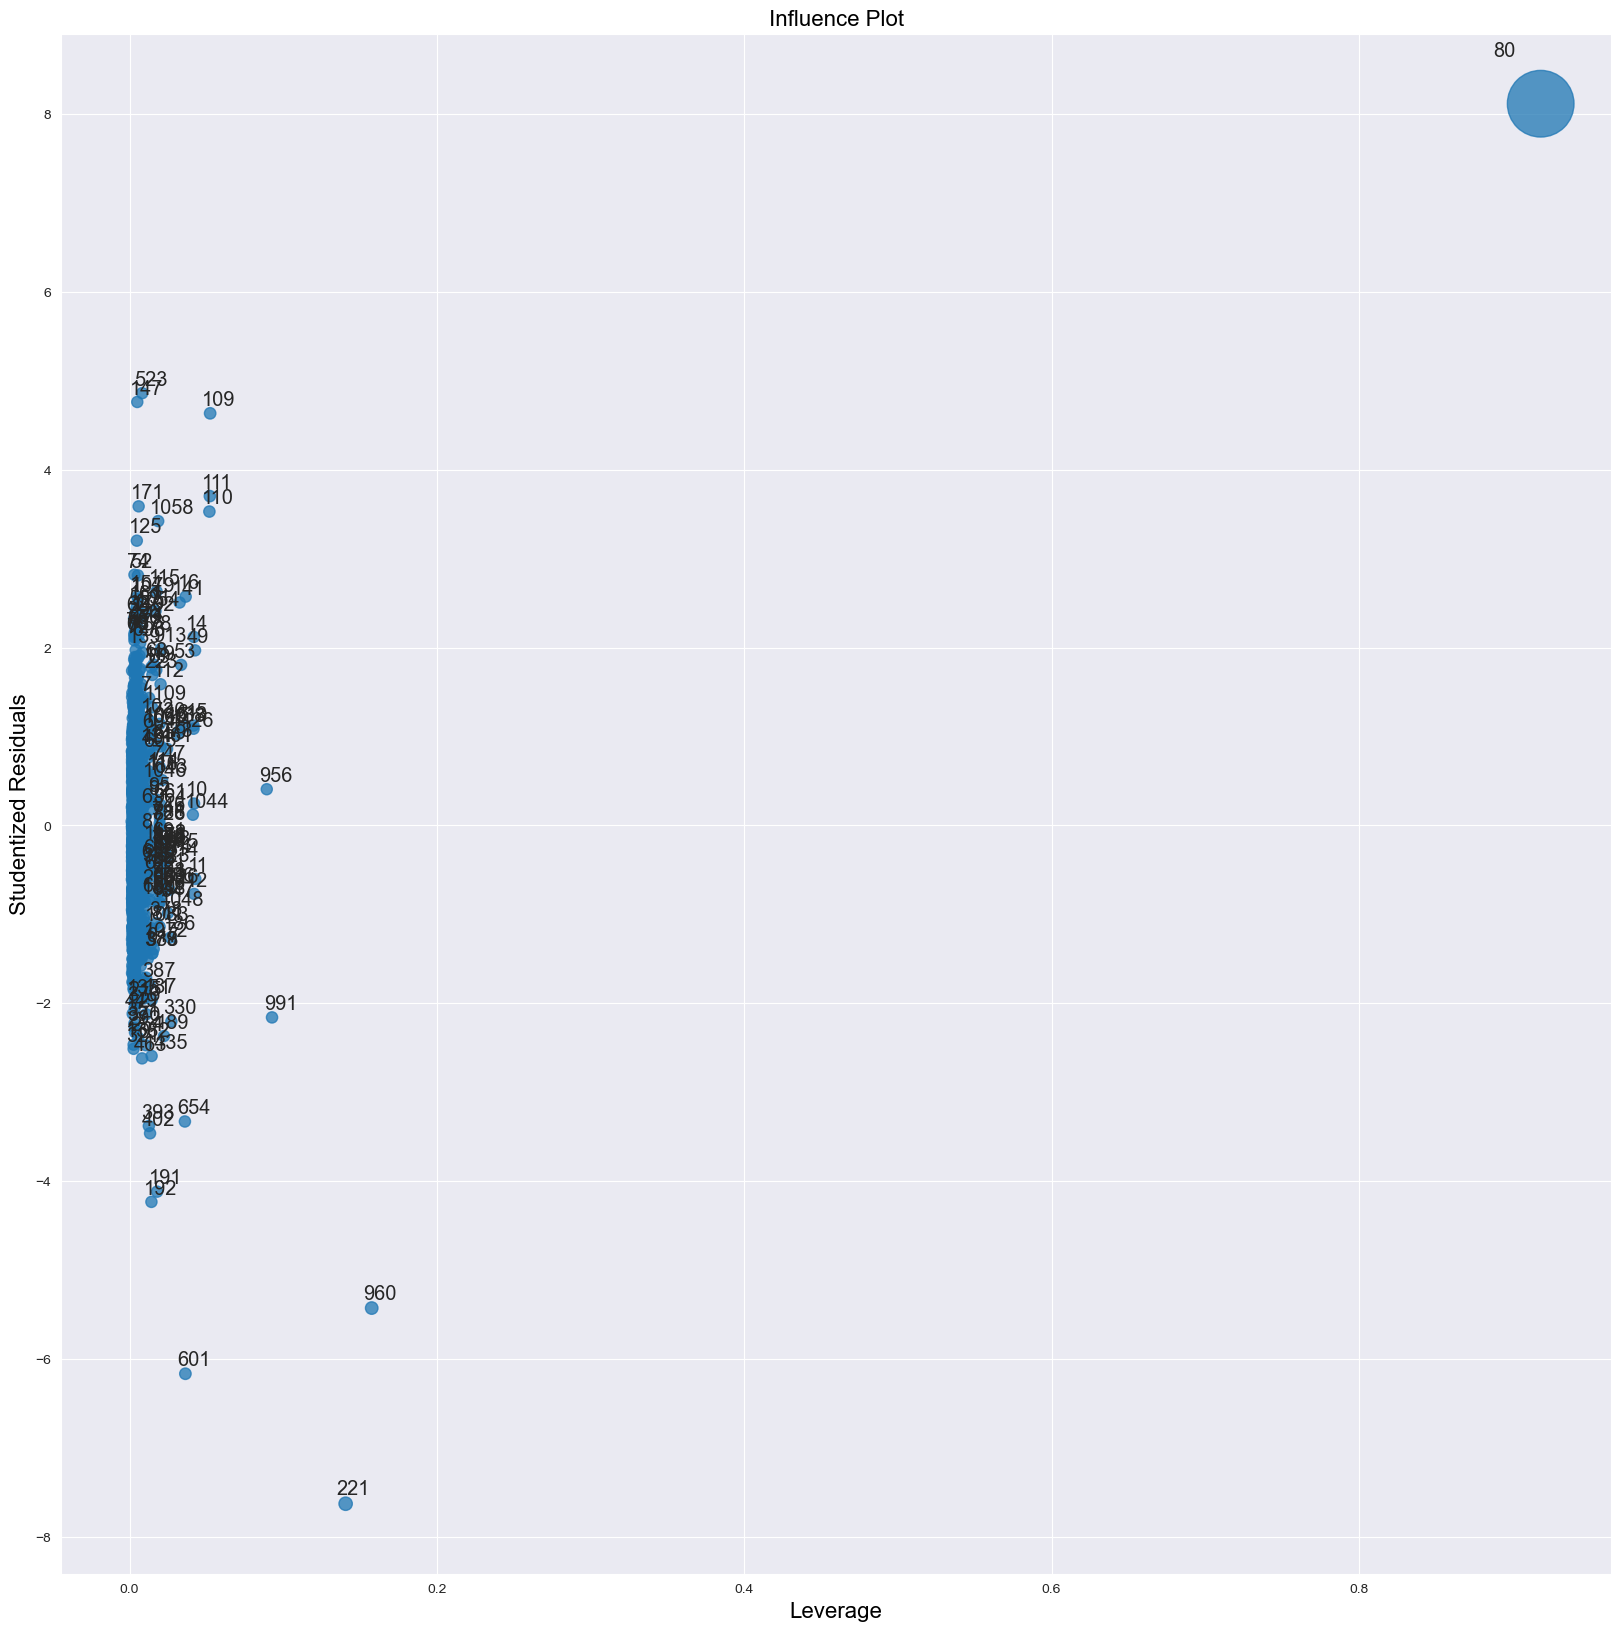

In [50]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [45]:
(np.argmax(c),np.max(c))

(80, 78.72950582247037)

In [46]:
np.where(c>=0.018815331010452963)

(array([  14,   16,   49,   80,  109,  110,  111,  140,  190,  191,  220,
         522,  600,  653,  959,  990, 1057], dtype=int64),)

# Improving the model

In [56]:
#Discard the data points which are influencers and reasign the row number (reset_index())

new_data=data4.drop(data4.index[[14,   16,   49,   80,  109,  110,  111,  140,  190,  191,  220,
         522,  600,  653,  959,  990, 1057]],axis=0).reset_index()

In [57]:
#Drop the original index

new_data=new_data.drop(['index'],axis=1)

In [58]:
new_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1413,7500,69,20544,86,1300,3,5,69,1025
1414,10845,72,19000,86,1300,3,5,69,1015
1415,8500,71,17016,86,1300,3,5,69,1015
1416,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [63]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=new_data).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        new_data=new_data.drop(new_data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        new_data
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=new_data).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8883230336857072
Thus model accuracy is improved to 0.8889229983857213
Thus model accuracy is improved to 0.8897942788961625
Thus model accuracy is improved to 0.8892326077661357
Thus model accuracy is improved to 0.8903879563757863
Thus model accuracy is improved to 0.8895239558162494
Thus model accuracy is improved to 0.8898960234448476
Thus model accuracy is improved to 0.8903208318396925
Thus model accuracy is improved to 0.8908014686337989
Thus model accuracy is improved to 0.8901005575125875
Thus model accuracy is improved to 0.8894678831369645
Thus model accuracy is improved to 0.8894880027099145
Thus model accuracy is improved to 0.8900243177601598
Thus model accuracy is improved to 0.8894961653289413
Thus model accuracy is improved to 0.888830069020742
Thus model accuracy is improved to 0.889057755618488
Thus model accuracy is improved to 0.8898790181431517
Thus model accuracy is improved to 0.8905555862707121
Thus model accuracy is improve

In [64]:
(final_model.rsquared,final_model.aic)

(0.900376253231856, 22093.15780800706)

In [65]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        03:16:02   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP             7.8533      3.037      2.586      0.010       1.895      13.812
CC            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears        251.4363    163.559      1.537      0.124     -69.428     572.301
QT           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
new_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


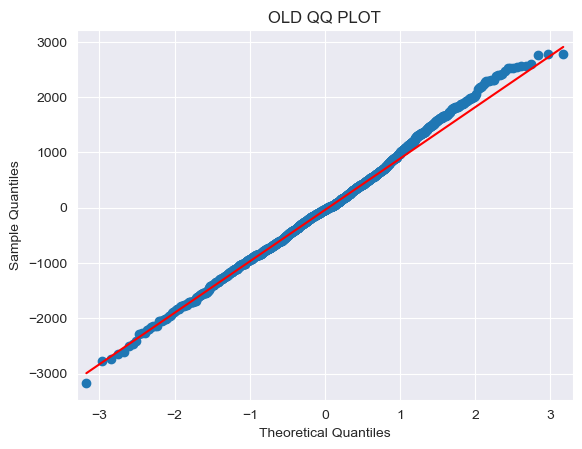

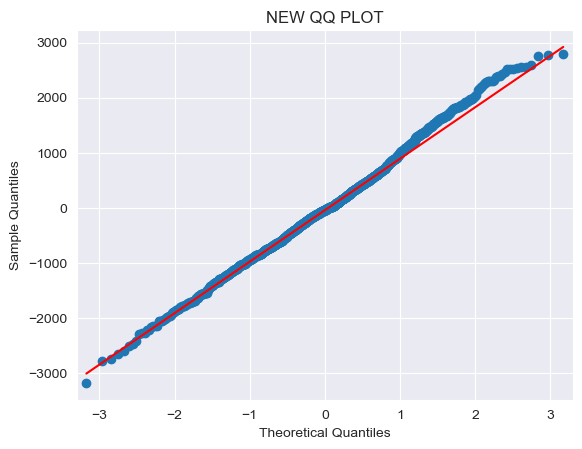

In [66]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("OLD QQ PLOT")
plt.show()
import statsmodels.api as sm
qqplot=sm.qqplot(final_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("NEW QQ PLOT")
plt.show()

Text(0.5, 1.0, 'NEW HIST')

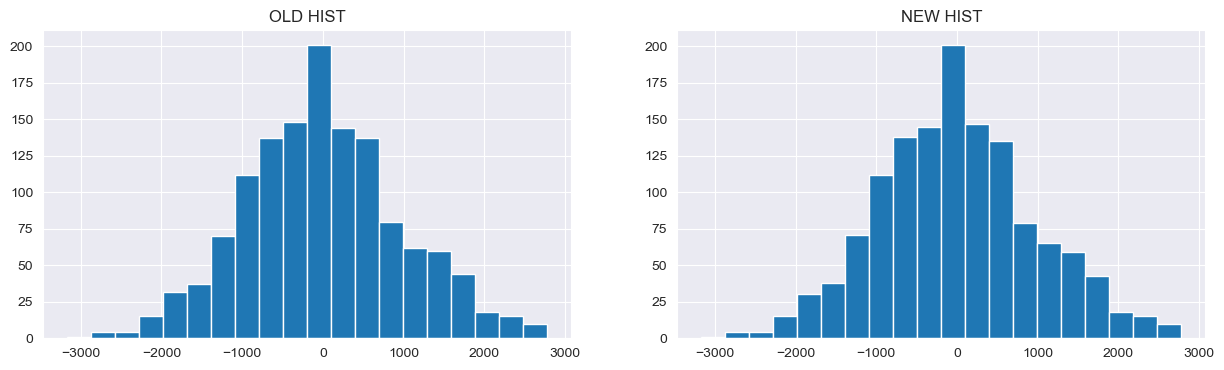

In [68]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

plt.hist(model.resid,bins=20)
plt.title("OLD HIST")


plt.subplot(1,2,2)

plt.hist(final_model.resid,bins=20)
plt.title("NEW HIST")

In [69]:
new_data1=pd.DataFrame({'Age':23,"KM":72937,"HP":90,"CC":2000,"Doors":3,"Gears":5,"QT":210,"Weight":1165},index=[0])
new_data1

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,23,72937,90,2000,3,5,210,1165


In [70]:
final_model.predict(new_data1)

0    15354.362106
dtype: float64

In [71]:
pred_y=final_model.predict(new_data)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64